In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Plot settings
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

# Connect and load data
db_path = Path('../data/processed/employee_feedback.db')
conn = sqlite3.connect(db_path)

query = """
SELECT 
    e.*, d.name as department, p.title as position, l.name as location,
    f.*,
    ou.n0_empresa, ou.n1_diretoria, ou.n2_gerencia, 
    ou.n3_coordenacao, ou.n4_area
FROM employees e
JOIN departments d ON e.department_id = d.id
JOIN positions p ON e.position_id = p.id
JOIN locations l ON e.location_id = l.id
JOIN organizational_units ou ON e.org_unit_id = ou.id
JOIN feedback_responses f ON e.id = f.employee_id
"""
df = pd.read_sql_query(query, conn)

In [11]:
# Basic dataset information
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Sample of the data
print("\nSample Records:")
df.head()

Dataset Shape: (500, 40)

Data Types:
 id                                 int64
name                              object
email                             object
corporate_email                   object
department_id                      int64
position_id                        int64
role                              object
location_id                        int64
company_tenure                    object
gender                            object
generation                        object
org_unit_id                        int64
department                        object
position                          object
location                          object
id                                 int64
employee_id                        int64
response_date                     object
position_interest                  int64
contribution                       int64
learning_development               int64
feedback_score                     int64
manager_interaction                int64
career_clarity    

,id,name,email,corporate_email,department_id,position_id,role,location_id,company_tenure,gender,generation,org_unit_id,department,position,location,id,employee_id,response_date,position_interest,contribution,learning_development,feedback_score,manager_interaction,career_clarity,permanence_expectation,enps_score,position_interest_comment,contribution_comment,learning_development_comment,feedback_comment,manager_interaction_comment,career_clarity_comment,permanence_expectation_comment,enps_comment,created_at,n0_empresa,n1_diretoria,n2_gerencia,n3_coordenacao,n4_area
0,1,Demo 001,demo001@pinpeople.com.br,demo001@pinpeople.com.br,1,1,profissional,1,entre 1 e 2 anos,masculino,geração z,1,administrativo,estagiário,brasília,1,1,2022-01-20 00:00:00,7,1,1,6,6,6,2,5,-,-,-,-,-,-,-,A empresa tem um excelente ambiente de trabalh...,2025-01-09 01:57:44,empresa,diretoria a,gerência a1,coordenação a11,área a112
1,2,Demo 002,demo002@pinpeople.com.br,demo002@pinpeople.com.br,2,1,profissional,2,entre 1 e 2 anos,outro,geração z,2,comercial,estagiário,recife,2,2,2022-01-20 00:00:00,1,6,5,3,6,2,6,8,-,Gostaria de liderar iniciativas que agreguem v...,-,-,Meu gestor é acessível e apoia minha carreira.,-,-,Sinto falta de mais oportunidades de crescimen...,2025-01-09 01:57:44,empresa,diretoria a,gerência a1,coordenação a11,área a111
2,3,Demo 003,demo003@pinpeople.com.br,demo003@pinpeople.com.br,3,2,profissional,1,menos de 1 ano,masculino,geração z,2,financeiro,analista,brasília,3,3,2022-01-20 00:00:00,6,6,7,7,5,2,7,9,-,-,-,A comunicação sobre desempenho é clara.,-,-,Pretendo continuar na empresa por muitos anos.,"Os benefícios oferecidos são bons, mas poderia...",2025-01-09 01:57:44,empresa,diretoria a,gerência a1,coordenação a11,área a111
3,4,Demo 004,demo004@pinpeople.com.br,demo004@pinpeople.com.br,4,2,profissional,2,entre 1 e 2 anos,feminino,geração z,1,recursos humanos,analista,recife,4,4,2022-01-20 00:00:00,5,7,6,5,5,5,1,8,-,-,-,-,-,-,-,A comunicação interna pode ser melhorada para ...,2025-01-09 01:57:44,empresa,diretoria a,gerência a1,coordenação a11,área a112
4,5,Demo 005,demo005@pinpeople.com.br,demo005@pinpeople.com.br,5,2,profissional,1,entre 2 e 5 anos,outro,geração z,2,tecnologia,analista,brasília,5,5,2022-01-20 00:00:00,4,5,6,5,7,7,1,1,-,Sinto que posso contribuir ainda mais com recu...,-,-,-,-,-,Estou satisfeito com a cultura da empresa e co...,2025-01-09 01:57:44,empresa,diretoria a,gerência a1,coordenação a11,área a111


In [12]:
# Numeric columns analysis
numeric_cols = ['position_interest', 'contribution', 'learning_development', 
                'feedback_score', 'manager_interaction', 'career_clarity', 
                'permanence_expectation', 'enps_score']

print("Numeric Columns Statistics:")
df[numeric_cols].describe()

Numeric Columns Statistics:


,position_interest,contribution,learning_development,feedback_score,manager_interaction,career_clarity,permanence_expectation,enps_score
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5.72400,5.648000,5.432000,5.390000,4.918000,4.202000,3.906000,7.544000
std,1.62268,1.670232,1.549897,1.602197,1.685514,1.850417,1.989241,2.486046
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,6.00000,6.000000,5.000000,5.000000,4.000000,3.000000,2.000000,6.000000
50%,6.00000,6.000000,6.000000,6.000000,5.000000,4.000000,4.000000,8.000000
75%,7.00000,7.000000,7.000000,7.000000,6.000000,6.000000,6.000000,9.000000
max,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000


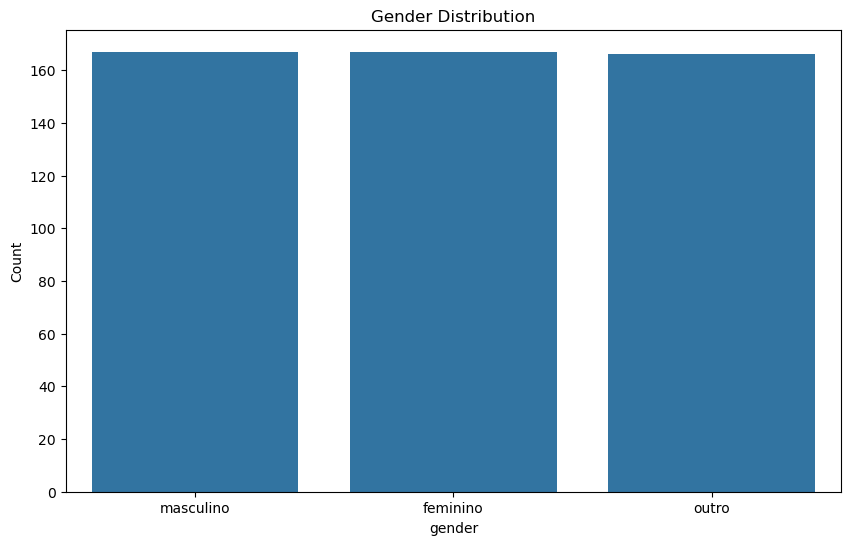


Gender Distribution Percentages:
gender
masculino    33.4
feminino     33.4
outro        33.2
Name: proportion, dtype: float64


In [13]:
plt.figure(figsize=(10, 6))
gender_dist = df['gender'].value_counts()
sns.barplot(x=gender_dist.index, y=gender_dist.values)
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

print("\nGender Distribution Percentages:")
print(df['gender'].value_counts(normalize=True).round(3) * 100)

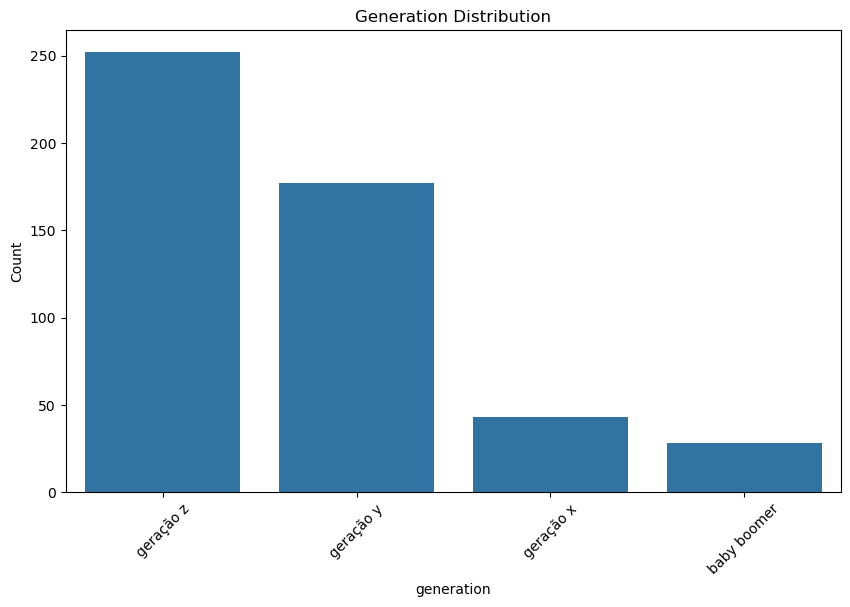


Generation Distribution Percentages:
generation
geração z      50.4
geração y      35.4
geração x       8.6
baby boomer     5.6
Name: proportion, dtype: float64


In [14]:
plt.figure(figsize=(10, 6))
gen_dist = df['generation'].value_counts()
sns.barplot(x=gen_dist.index, y=gen_dist.values)
plt.title('Generation Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

print("\nGeneration Distribution Percentages:")
print(df['generation'].value_counts(normalize=True).round(3) * 100)

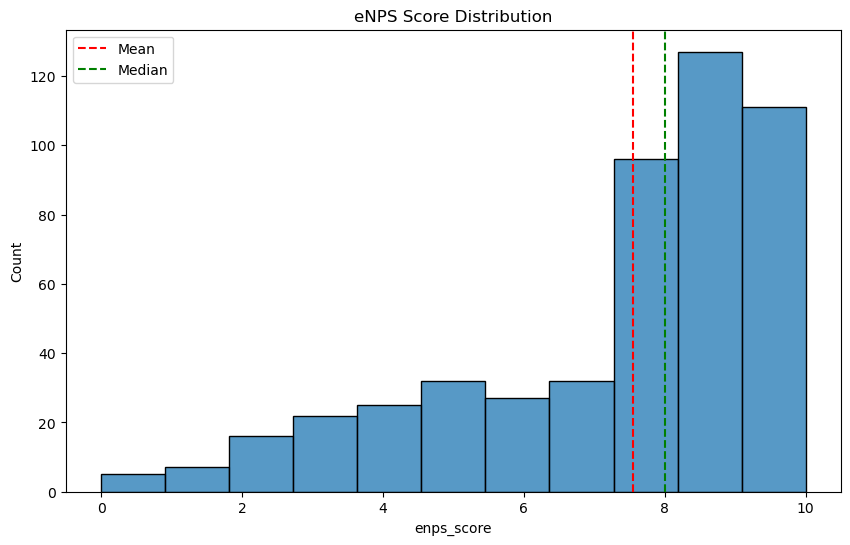


eNPS Score Statistics:
count    500.00
mean       7.54
std        2.49
min        0.00
25%        6.00
50%        8.00
75%        9.00
max       10.00
Name: enps_score, dtype: float64


In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='enps_score', bins=11)
plt.title('eNPS Score Distribution')
plt.axvline(df['enps_score'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['enps_score'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

print("\neNPS Score Statistics:")
print(df['enps_score'].describe().round(2))

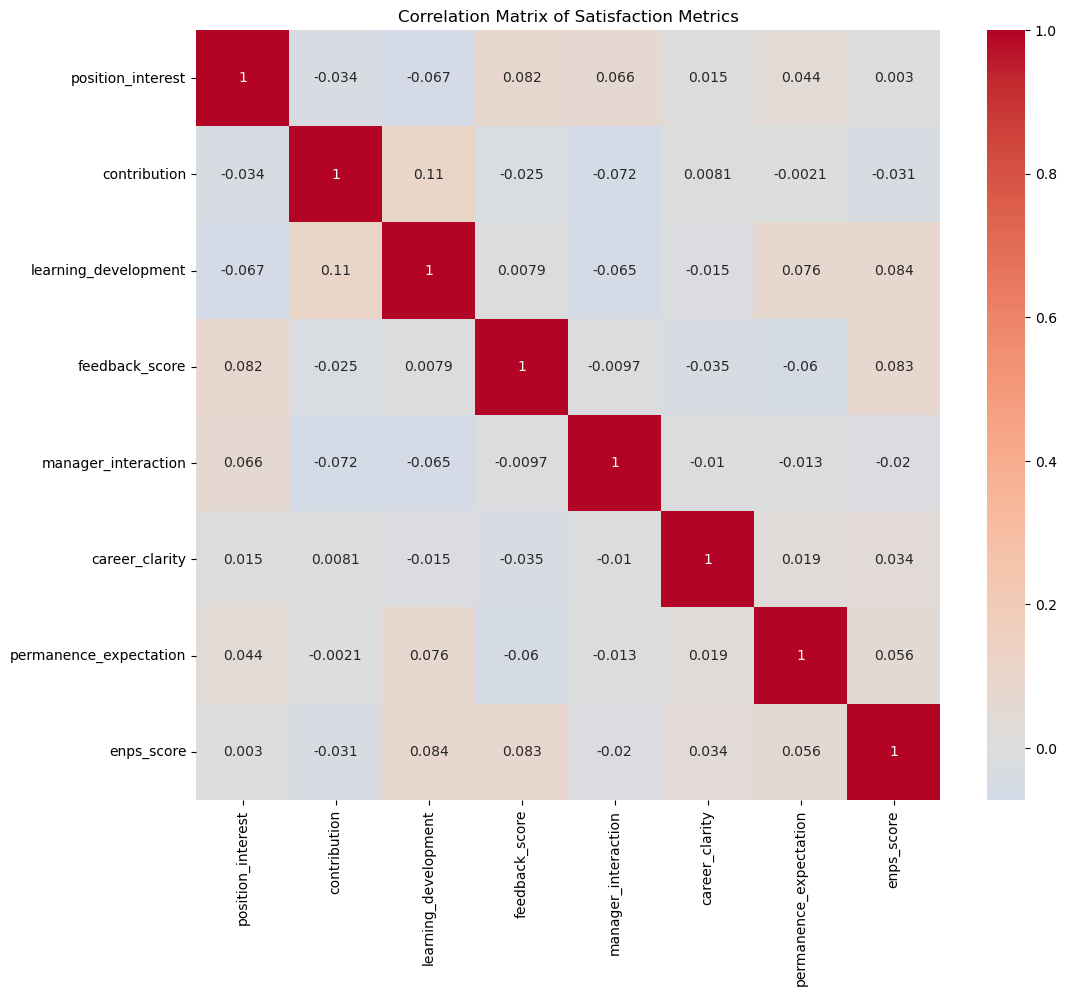


Strongest Correlations:
                    var1                    var2  correlation
7           contribution    learning_development     0.110727
17  learning_development              enps_score     0.083994
21        feedback_score              enps_score     0.083478
2      position_interest          feedback_score     0.082339
16  learning_development  permanence_expectation     0.076247


In [16]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Satisfaction Metrics')
plt.show()

# Print strongest correlations
corr_matrix = df[numeric_cols].corr()
print("\nStrongest Correlations:")
correlations = []
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        correlations.append({
            'var1': numeric_cols[i],
            'var2': numeric_cols[j],
            'correlation': corr_matrix.iloc[i,j]
        })
        
corr_df = pd.DataFrame(correlations)
print(corr_df.nlargest(5, 'correlation'))

Department Metrics:
                 enps_score             career_clarity permanence_expectation
                       mean   std count           mean                   mean
department                                                                   
administrativo         7.56  2.70   100           4.30                   4.01
comercial              7.36  2.78   100           4.15                   3.80
financeiro             7.67  2.29   100           3.93                   4.14
recursos humanos       7.57  2.25   100           4.11                   4.03
tecnologia             7.56  2.41   100           4.52                   3.55


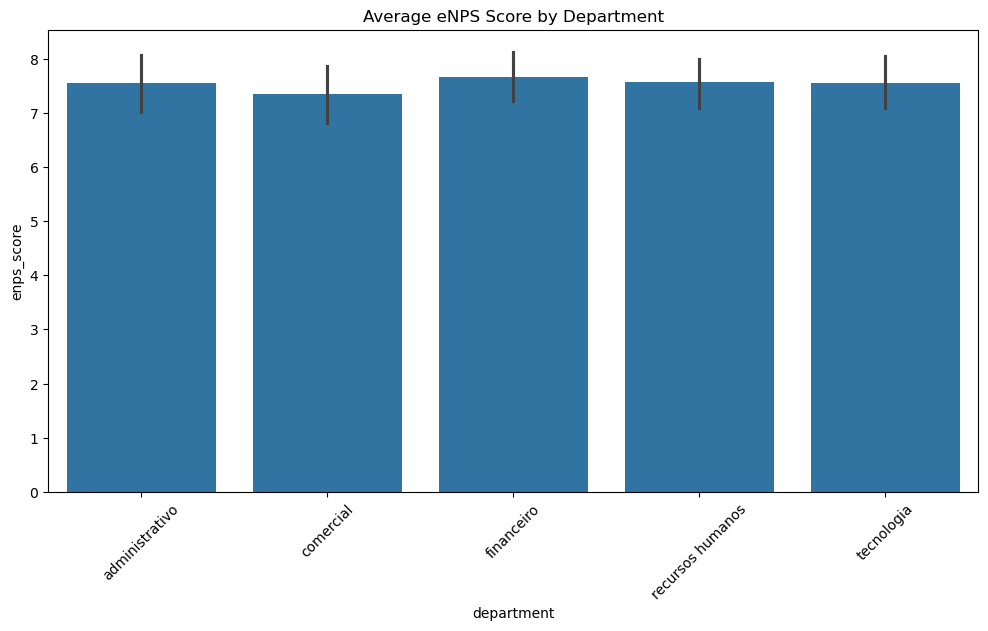

In [17]:
dept_metrics = df.groupby('department').agg({
    'enps_score': ['mean', 'std', 'count'],
    'career_clarity': 'mean',
    'permanence_expectation': 'mean'
}).round(2)

print("Department Metrics:")
print(dept_metrics)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='department', y='enps_score')
plt.title('Average eNPS Score by Department')
plt.xticks(rotation=45)
plt.show()

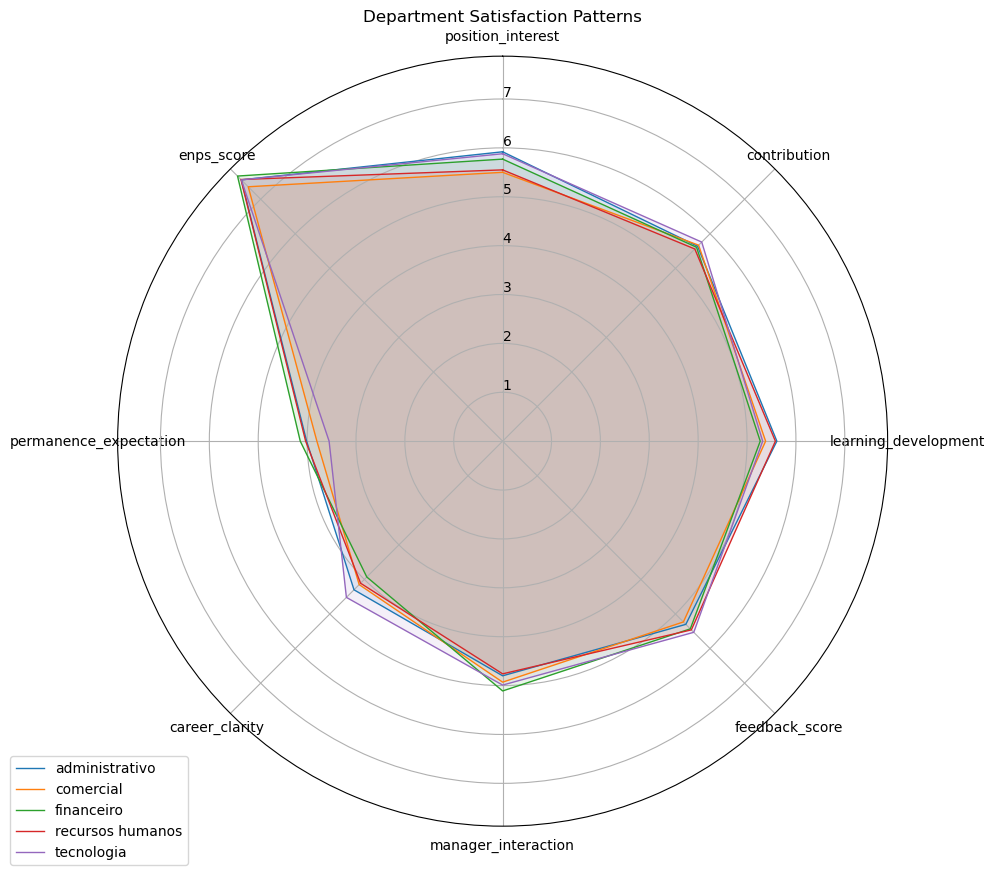

In [18]:
# Radar chart of department metrics
dept_metrics = df.groupby('department')[numeric_cols].mean()

# Create the radar chart
def radar_chart(df, title):
    categories = df.columns
    n_cats = len(categories)
    
    angles = [n/float(n_cats) * 2 * np.pi for n in range(n_cats)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    for idx, dept in enumerate(df.index):
        values = df.loc[dept].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=dept)
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)
    
    plt.xticks(angles[:-1], categories)
    plt.title(title)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    return fig

radar_chart(dept_metrics, "Department Satisfaction Patterns")
plt.show()

Location Metrics:
             enps_score             career_clarity permanence_expectation
                   mean   std count           mean                   mean
location                                                                 
brasília           7.72  2.34   100           4.42                   3.92
manaus             7.88  2.07   100           4.08                   3.78
porto alegre       7.33  2.79   100           4.24                   3.88
recife             7.36  2.56   100           4.43                   3.94
são paulo          7.43  2.61   100           3.84                   4.01


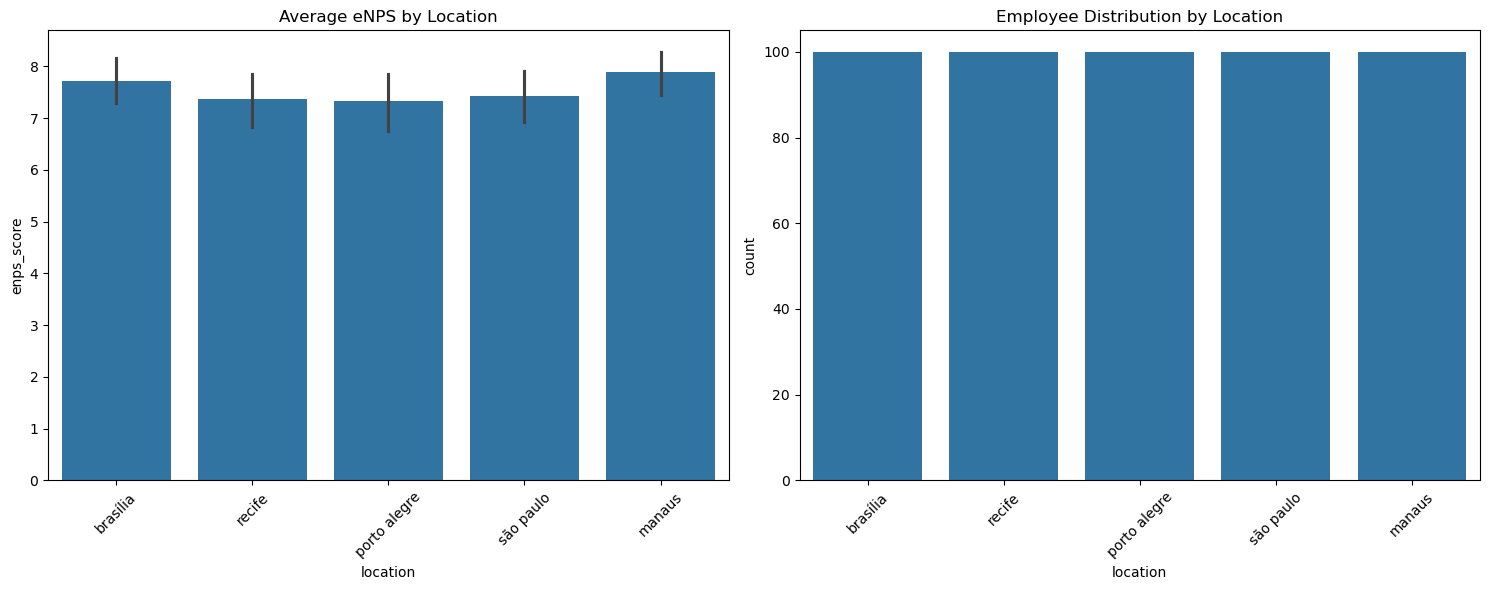

In [19]:
# Location metrics
location_metrics = df.groupby('location').agg({
    'enps_score': ['mean', 'std', 'count'],
    'career_clarity': 'mean',
    'permanence_expectation': 'mean'
}).round(2)

print("Location Metrics:")
print(location_metrics)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=df, x='location', y='enps_score', ax=ax1)
ax1.set_title('Average eNPS by Location')
ax1.tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='location', ax=ax2)
ax2.set_title('Employee Distribution by Location')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [20]:
print("Key Findings:")
print("-" * 50)

# Overall satisfaction
print("\n1. Overall Satisfaction:")
print(f"- Average eNPS: {df['enps_score'].mean():.2f}")
print(f"- Median eNPS: {df['enps_score'].median():.2f}")
print(f"- eNPS Standard Deviation: {df['enps_score'].std():.2f}")

# Department insights
print("\n2. Department Insights:")
for dept in df['department'].unique():
    dept_data = df[df['department'] == dept]
    print(f"\n{dept}:")
    print(f"- Average eNPS: {dept_data['enps_score'].mean():.2f}")
    print(f"- Career Clarity: {dept_data['career_clarity'].mean():.2f}")
    print(f"- Permanence Expectation: {dept_data['permanence_expectation'].mean():.2f}")

# Generation insights
print("\n3. Generation Insights:")
for gen in df['generation'].unique():
    gen_data = df[df['generation'] == gen]
    print(f"\n{gen}:")
    print(f"- Average eNPS: {gen_data['enps_score'].mean():.2f}")
    print(f"- Count: {len(gen_data)}")

# Location insights
print("\n4. Location Insights:")
for loc in df['location'].unique():
    loc_data = df[df['location'] == loc]
    print(f"\n{loc}:")
    print(f"- Average eNPS: {loc_data['enps_score'].mean():.2f}")
    print(f"- Employee Count: {len(loc_data)}")

Key Findings:
--------------------------------------------------

1. Overall Satisfaction:
- Average eNPS: 7.54
- Median eNPS: 8.00
- eNPS Standard Deviation: 2.49

2. Department Insights:

administrativo:
- Average eNPS: 7.56
- Career Clarity: 4.30
- Permanence Expectation: 4.01

comercial:
- Average eNPS: 7.36
- Career Clarity: 4.15
- Permanence Expectation: 3.80

financeiro:
- Average eNPS: 7.67
- Career Clarity: 3.93
- Permanence Expectation: 4.14

recursos humanos:
- Average eNPS: 7.57
- Career Clarity: 4.11
- Permanence Expectation: 4.03

tecnologia:
- Average eNPS: 7.56
- Career Clarity: 4.52
- Permanence Expectation: 3.55

3. Generation Insights:

geração z:
- Average eNPS: 7.65
- Count: 252

geração y:
- Average eNPS: 7.61
- Count: 177

geração x:
- Average eNPS: 6.40
- Count: 43

baby boomer:
- Average eNPS: 7.89
- Count: 28

4. Location Insights:

brasília:
- Average eNPS: 7.72
- Employee Count: 100

recife:
- Average eNPS: 7.36
- Employee Count: 100

porto alegre:
- Average

In [21]:
from scipy import stats

# ANOVA test for department differences
departments = df['department'].unique()
dept_groups = [df[df['department'] == dept]['enps_score'] for dept in departments]
f_stat, p_value = stats.f_oneway(*dept_groups)

print("One-way ANOVA test for department differences:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")

# Chi-square test for generation and satisfaction level
df['satisfaction_level'] = pd.qcut(df['enps_score'], q=3, labels=['Low', 'Medium', 'High'])
contingency_table = pd.crosstab(df['generation'], df['satisfaction_level'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-square test for generation and satisfaction level:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

One-way ANOVA test for department differences:
F-statistic: 0.20
p-value: 0.9358

Chi-square test for generation and satisfaction level:
Chi-square statistic: 6.56
p-value: 0.3638


In [23]:
from scipy import stats

locations = df['location'].value_counts().nlargest(2).index
loc1_scores = df[df['location'] == locations[0]]['enps_score']
loc2_scores = df[df['location'] == locations[1]]['enps_score']

statistic, pvalue = stats.mannwhitneyu(loc1_scores, loc2_scores)
print(f"Mann-Whitney U test comparing {locations[0]} and {locations[1]}:")
print(f"Statistic: {statistic:.2f}")
print(f"p-value: {pvalue:.4f}")

Mann-Whitney U test comparing brasília and recife:
Statistic: 5406.50
p-value: 0.3126


C:\Users\PedroCortesdosSantos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PedroCortesdosSantos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PedroCortesdosSantos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\PedroCortesdosSantos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: 

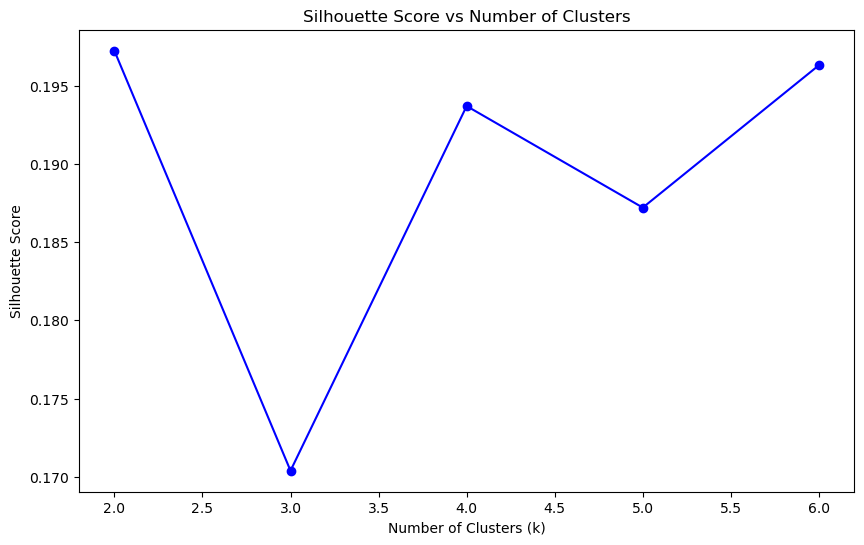

C:\Users\PedroCortesdosSantos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Cluster Analysis:

Cluster Profiles:
         enps_score  career_clarity  permanence_expectation  \
cluster                                                       
0              8.87            4.16                    4.00   
1              3.96            4.33                    3.65   

         position_interest  manager_interaction  
cluster                                          
0                     5.75                 4.88  
1                     5.64                 5.01  


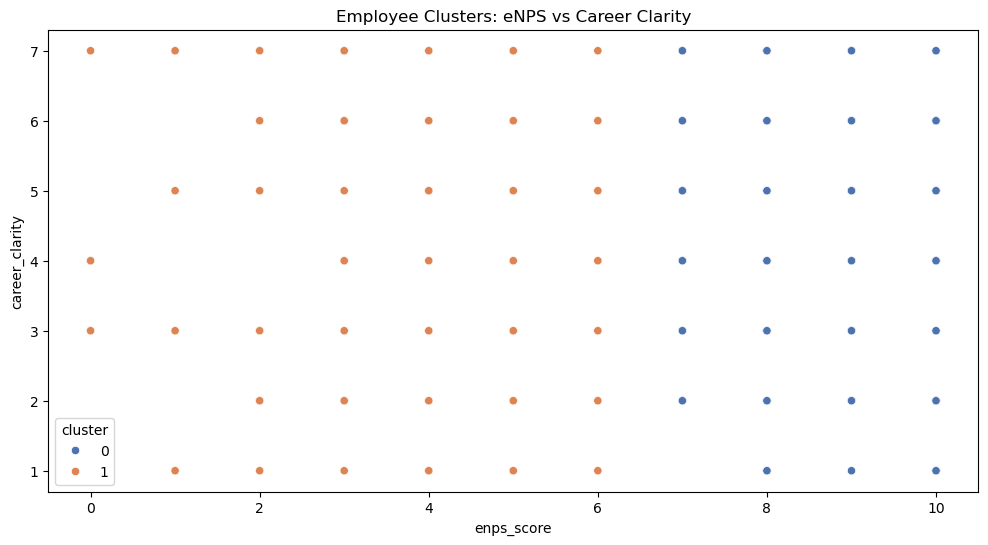

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare data for clustering
cluster_features = ['enps_score', 'career_clarity', 'permanence_expectation', 
                   'position_interest', 'manager_interaction']
X = df[cluster_features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters
silhouette_scores = []
K = range(2, 7)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Apply optimal clustering
optimal_k = K[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
print("\nCluster Analysis:")
cluster_profile = df.groupby('cluster')[cluster_features].mean().round(2)
print("\nCluster Profiles:")
print(cluster_profile)

# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='enps_score', y='career_clarity', hue='cluster', palette='deep')
plt.title('Employee Clusters: eNPS vs Career Clarity')
plt.show()


Model Performance:
R² Score: -0.040
RMSE: 2.598


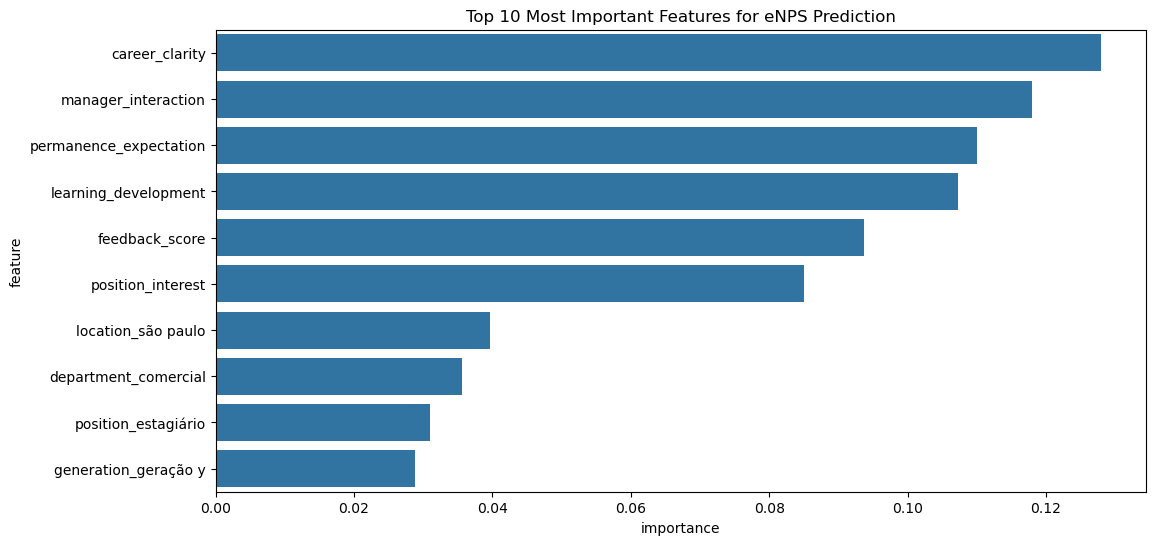

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features for prediction
features = ['career_clarity', 'permanence_expectation', 'position_interest', 
           'manager_interaction', 'learning_development', 'feedback_score']
X = df[features]
y = df['enps_score']

# Create dummy variables for categorical columns
categorical_features = ['department', 'position', 'location', 'generation']
X_cat = pd.get_dummies(df[categorical_features], drop_first=True)
X = pd.concat([X, X_cat], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print("\nModel Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features for eNPS Prediction')
plt.show()

Risk Analysis (% at risk):
                  dept_risk  gen_risk  pos_risk
department                                     
administrativo         20.0       NaN       NaN
comercial              23.0       NaN       NaN
financeiro             20.0       NaN       NaN
recursos humanos       24.0       NaN       NaN
tecnologia             24.0       NaN       NaN


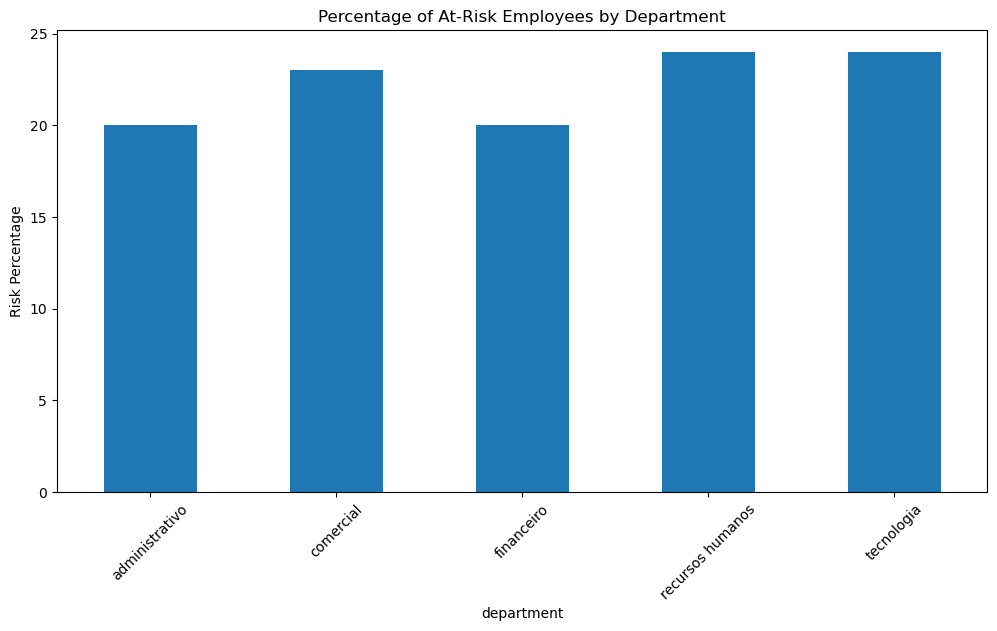

In [27]:
df['at_risk'] = (df['enps_score'] <= 6) & (df['permanence_expectation'] <= 5)

# Analyze risk factors
risk_analysis = pd.DataFrame()

# Department risk
risk_analysis['dept_risk'] = df.groupby('department')['at_risk'].mean() * 100

# Generation risk
risk_analysis['gen_risk'] = df.groupby('generation')['at_risk'].mean() * 100

# Position risk
risk_analysis['pos_risk'] = df.groupby('position')['at_risk'].mean() * 100

print("Risk Analysis (% at risk):")
print(risk_analysis.round(2))

# Visualize risk factors
plt.figure(figsize=(12, 6))
risk_analysis['dept_risk'].plot(kind='bar')
plt.title('Percentage of At-Risk Employees by Department')
plt.ylabel('Risk Percentage')
plt.xticks(rotation=45)
plt.show()